# Prediction with genetic algorithms and correction with probabilistic rules

This notebook gathers the results for the predictions made on the mono-objective genetic algorithms, considering a binary threshold of 30, and the later correction using probabilistic rules.

### Brief explanation

With the already chosen best models, we predicted hypometabolism for the patients in our database. By predicting each brain region independently, we created a whole brain map. However, and since variability was a big deal in some regions, we performed 10 predictions per region, which led to 10 different brain maps. For each of them, absolute and normalised rules were applied. Eventually, consensus brain maps were calculated before and after rule application. The relevance threshold, which determines how strict we are in considering rules, has been set as a parameter varying from 0.5 to 1.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the prtools.py file.

In [1]:
import matplotlib
import seaborn
import warnings
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from prtools import *
da = Datasets()
ra = RuleApplication()

In [2]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
real_aal = da.define_binary(pandas.read_csv('../../Data/Y_aal_quan.csv'),30)
real_brodmann = da.define_binary(pandas.read_csv('../../Data/Y_brodmann_quan.csv'),30)
prediction_aal = pandas.read_csv('./Prediction_mono_30/Prediction/prediction_aal.csv')
prediction_brodmann = pandas.read_csv('./Prediction_mono_30/Prediction/prediction_brodmann.csv')

In [4]:
relevance_thresholds_absolute = [1,0.975,0.950,0.925,0.9,0.8,0.7,0.6,0.5]
relevance_thresholds_normalised = [0.9,0.8,0.7,0.6,0.5]

In [5]:
aal_list.remove('f1mo_l')
aal_list.remove('f1mo_r')

#### Absolute rules

In [6]:
comparison_absolute_aal = ra.compare_with_real(prediction_aal,real_aal)
comparison_absolute_brodmann = ra.compare_with_real(prediction_brodmann,real_brodmann)
index = ['Prediction']
for relevance_threshold in relevance_thresholds_absolute:
    absolute_aal = pandas.read_csv('./Prediction_mono_30/Absolute/correction_aal_'+str(relevance_threshold)+'.csv')
    absolute_brodmann = pandas.read_csv('./Prediction_mono_30/Absolute/correction_brodmann_'+str(relevance_threshold)+'.csv')
    comparison_absolute_aal = pandas.concat([comparison_absolute_aal,ra.compare_with_real(absolute_aal,real_aal)],axis=0)
    comparison_absolute_brodmann = pandas.concat([comparison_absolute_brodmann,ra.compare_with_real(absolute_brodmann,real_brodmann)],axis=0)
    index.append('Relevance threshold = '+str(relevance_threshold))
comparison_absolute_aal.index = index
comparison_absolute_brodmann.index = index

In [7]:
TFP_absolute_aal = comparison_absolute_aal[['TP','FP']].transpose()
TFP_absolute_brodmann = comparison_absolute_brodmann[['TP','FP']].transpose()
added_absolute_aal = []
added_absolute_brodmann = []
for relevance_threshold in relevance_thresholds_absolute:
        temp_TFP_aal = TFP_absolute_aal['Relevance threshold = '+str(relevance_threshold)]-TFP_absolute_aal['Prediction']
        temp_TFP_brodmann = TFP_absolute_brodmann['Relevance threshold = '+str(relevance_threshold)]-TFP_absolute_brodmann['Prediction']
        added_absolute_aal.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_aal[0]+temp_TFP_aal[1])+' regions were marked as hypometabolic: '+str(temp_TFP_aal[0])+' correctly ('+str(round(temp_TFP_aal[0]*100/(temp_TFP_aal[0]+temp_TFP_aal[1]),2))+' %) and '+str(temp_TFP_aal[1])+' incorrectly')
        added_absolute_brodmann.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_brodmann[0]+temp_TFP_brodmann[1])+' regions were marked as hypometabolic: '+str(temp_TFP_brodmann[0])+' correctly ('+str(round(temp_TFP_brodmann[0]*100/(temp_TFP_brodmann[0]+temp_TFP_brodmann[1]),2))+' %) and '+str(temp_TFP_brodmann[1])+' incorrectly')

In [8]:
correct_absolute_aal_regions = pandas.DataFrame()
percentage_absolute_aal_regions = pandas.DataFrame()
for task in aal_list:
    try:
        corrects = []
        percentages = []
        to_compare = ra.compare_with_real(prediction_aal[[task]],real_aal[[task]])
        for relevance_threshold in relevance_thresholds_absolute:
            absolute_aal = pandas.read_csv('./Prediction_mono_30/Absolute/correction_aal_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(absolute_aal[[task]],real_aal[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_absolute_aal_regions = pandas.concat([correct_absolute_aal_regions,temp_corrects],axis=1)
        except: correct_absolute_aal_regions = temp_corrects
        try: percentage_absolute_aal_regions = pandas.concat([percentage_absolute_aal_regions,temp_percentages],axis=1)
        except: percentage_absolute_aal_regions = temp_percentages
    except: pass
correct_absolute_aal_regions.index = relevance_thresholds_absolute
percentage_absolute_aal_regions.index = relevance_thresholds_absolute

In [9]:
correct_absolute_brodmann_regions = pandas.DataFrame()
percentage_absolute_brodmann_regions = pandas.DataFrame()
for task in brodmann_list:
    try:
        to_compare = ra.compare_with_real(prediction_brodmann[[task]],real_brodmann[[task]])
        corrects = []
        percentages = []
        for relevance_threshold in relevance_thresholds_absolute:
            absolute_brodmann = pandas.read_csv('./Prediction_mono_30/Absolute/correction_brodmann_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(absolute_brodmann[[task]],real_brodmann[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_absolute_brodmann_regions = pandas.concat([correct_absolute_brodmann_regions,temp_corrects],axis=1)
        except: correct_absolute_brodmann_regions = temp_corrects
        try: percentage_absolute_brodmann_regions = pandas.concat([percentage_absolute_brodmann_regions,temp_percentages],axis=1)
        except: percentage_absolute_brodmann_regions = temp_percentages
    except:pass
correct_absolute_brodmann_regions.index = relevance_thresholds_absolute
percentage_absolute_brodmann_regions.index = relevance_thresholds_absolute

#### Normalised rules

In [10]:
comparison_normalised_aal = ra.compare_with_real(prediction_aal,real_aal)
comparison_normalised_brodmann = ra.compare_with_real(prediction_brodmann,real_brodmann)
index = ['Prediction']
for relevance_threshold in relevance_thresholds_normalised:
    normalised_aal = pandas.read_csv('./Prediction_mono_30/Normalised/correction_aal_'+str(relevance_threshold)+'.csv')
    normalised_brodmann = pandas.read_csv('./Prediction_mono_30/Normalised/correction_brodmann_'+str(relevance_threshold)+'.csv')
    comparison_normalised_aal = pandas.concat([comparison_normalised_aal,ra.compare_with_real(normalised_aal,real_aal)],axis=0)
    comparison_normalised_brodmann = pandas.concat([comparison_normalised_brodmann,ra.compare_with_real(normalised_brodmann,real_brodmann)],axis=0)
    index.append('Relevance threshold = '+str(relevance_threshold))
comparison_normalised_aal.index = index
comparison_normalised_brodmann.index = index

In [11]:
TFP_normalised_aal = comparison_normalised_aal[['TP','FP']].transpose()
TFP_normalised_brodmann = comparison_normalised_brodmann[['TP','FP']].transpose()
added_normalised_aal = []
added_normalised_brodmann = []
for relevance_threshold in relevance_thresholds_normalised:
        temp_TFP_aal = TFP_normalised_aal['Relevance threshold = '+str(relevance_threshold)]-TFP_normalised_aal['Prediction']
        temp_TFP_brodmann = TFP_normalised_brodmann['Relevance threshold = '+str(relevance_threshold)]-TFP_normalised_brodmann['Prediction']
        added_normalised_aal.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_aal[0]+temp_TFP_aal[1])+' regions were marked as hypometabolic: '+str(temp_TFP_aal[0])+' correctly ('+str(round(temp_TFP_aal[0]*100/(temp_TFP_aal[0]+temp_TFP_aal[1]),2))+' %) and '+str(temp_TFP_aal[1])+' incorrectly')
        added_normalised_brodmann.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_brodmann[0]+temp_TFP_brodmann[1])+' regions were marked as hypometabolic: '+str(temp_TFP_brodmann[0])+' correctly ('+str(round(temp_TFP_brodmann[0]*100/(temp_TFP_brodmann[0]+temp_TFP_brodmann[1]),2))+' %) and '+str(temp_TFP_brodmann[1])+' incorrectly')

In [12]:
correct_normalised_aal_regions = pandas.DataFrame()
percentage_normalised_aal_regions = pandas.DataFrame()
for task in aal_list:
    try:
        corrects = []
        percentages = []
        to_compare = ra.compare_with_real(prediction_aal[[task]],real_aal[[task]])
        for relevance_threshold in relevance_thresholds_normalised:
            normalised_aal = pandas.read_csv('./Prediction_mono_30/Normalised/correction_aal_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(normalised_aal[[task]],real_aal[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_normalised_aal_regions = pandas.concat([correct_normalised_aal_regions,temp_corrects],axis=1)
        except: correct_normalised_aal_regions = temp_corrects
        try: percentage_normalised_aal_regions = pandas.concat([percentage_normalised_aal_regions,temp_percentages],axis=1)
        except: percentage_normalised_aal_regions = temp_percentages
    except: pass
correct_normalised_aal_regions.index = relevance_thresholds_normalised
percentage_normalised_aal_regions.index = relevance_thresholds_normalised

In [13]:
correct_normalised_brodmann_regions = pandas.DataFrame()
percentage_normalised_brodmann_regions = pandas.DataFrame()
for task in brodmann_list:
    try:
        to_compare = ra.compare_with_real(prediction_brodmann[[task]],real_brodmann[[task]])
        corrects = []
        percentages = []
        for relevance_threshold in relevance_thresholds_normalised:
            normalised_brodmann = pandas.read_csv('./Prediction_mono_30/Normalised/correction_brodmann_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(normalised_brodmann[[task]],real_brodmann[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_normalised_brodmann_regions = pandas.concat([correct_normalised_brodmann_regions,temp_corrects],axis=1)
        except: correct_normalised_brodmann_regions = temp_corrects
        try: percentage_normalised_brodmann_regions = pandas.concat([percentage_normalised_brodmann_regions,temp_percentages],axis=1)
        except: percentage_normalised_brodmann_regions = temp_percentages
    except:pass
correct_normalised_brodmann_regions.index = relevance_thresholds_normalised
percentage_normalised_brodmann_regions.index = relevance_thresholds_normalised

#### Random rules

In [14]:
FN_aal = comparison_absolute_aal.loc['Prediction']['FN']
TFN_aal = comparison_absolute_aal.loc['Prediction']['FN'] + comparison_absolute_aal.loc['Prediction']['TN']
FN_brodmann = comparison_absolute_brodmann.loc['Prediction']['FN']
TFN_brodmann = comparison_absolute_brodmann.loc['Prediction']['FN'] + comparison_absolute_brodmann.loc['Prediction']['TN']
random_aal = str(round((FN_aal*100/TFN_aal),2))+' %'
random_brodmann = str(round((FN_brodmann*100/TFN_brodmann),2))+' %'

### Results

#### AAL atlas (90 regions)

##### Using random corrector

A program that randomly changes negative labels to positive labels in our predicted dataset would label correctly what percentage of values?

In [15]:
print(random_aal)

5.95 %


##### Using absolute rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [16]:
comparison_absolute_aal

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,3106,22653,2687,1434,0.862,0.601,0.536,0.684
Relevance threshold = 1,3121,22618,2722,1419,0.861,0.601,0.534,0.687
Relevance threshold = 0.975,3259,22218,3122,1281,0.853,0.597,0.511,0.718
Relevance threshold = 0.95,3259,22218,3122,1281,0.853,0.597,0.511,0.718
Relevance threshold = 0.925,3285,22128,3212,1255,0.851,0.595,0.506,0.724
Relevance threshold = 0.9,3398,21751,3589,1142,0.842,0.590,0.486,0.748
Relevance threshold = 0.8,3580,20677,4663,960,0.812,0.560,0.434,0.789
Relevance threshold = 0.7,3825,18757,6583,715,0.756,0.512,0.368,0.843
Relevance threshold = 0.6,4026,16581,8759,514,0.690,0.465,0.315,0.887
Relevance threshold = 0.5,4143,14608,10732,397,0.628,0.427,0.279,0.913


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [17]:
for i in added_absolute_aal: print(i)

With a relevance threshold of 1, 50 regions were marked as hypometabolic: 15 correctly (30.0 %) and 35 incorrectly
With a relevance threshold of 0.975, 588 regions were marked as hypometabolic: 153 correctly (26.02 %) and 435 incorrectly
With a relevance threshold of 0.95, 588 regions were marked as hypometabolic: 153 correctly (26.02 %) and 435 incorrectly
With a relevance threshold of 0.925, 704 regions were marked as hypometabolic: 179 correctly (25.43 %) and 525 incorrectly
With a relevance threshold of 0.9, 1194 regions were marked as hypometabolic: 292 correctly (24.46 %) and 902 incorrectly
With a relevance threshold of 0.8, 2450 regions were marked as hypometabolic: 474 correctly (19.35 %) and 1976 incorrectly
With a relevance threshold of 0.7, 4615 regions were marked as hypometabolic: 719 correctly (15.58 %) and 3896 incorrectly
With a relevance threshold of 0.6, 6992 regions were marked as hypometabolic: 920 correctly (13.16 %) and 6072 incorrectly
With a relevance threshold

Down below we show the **effect that the application of rules have over each of the predicted regions**.

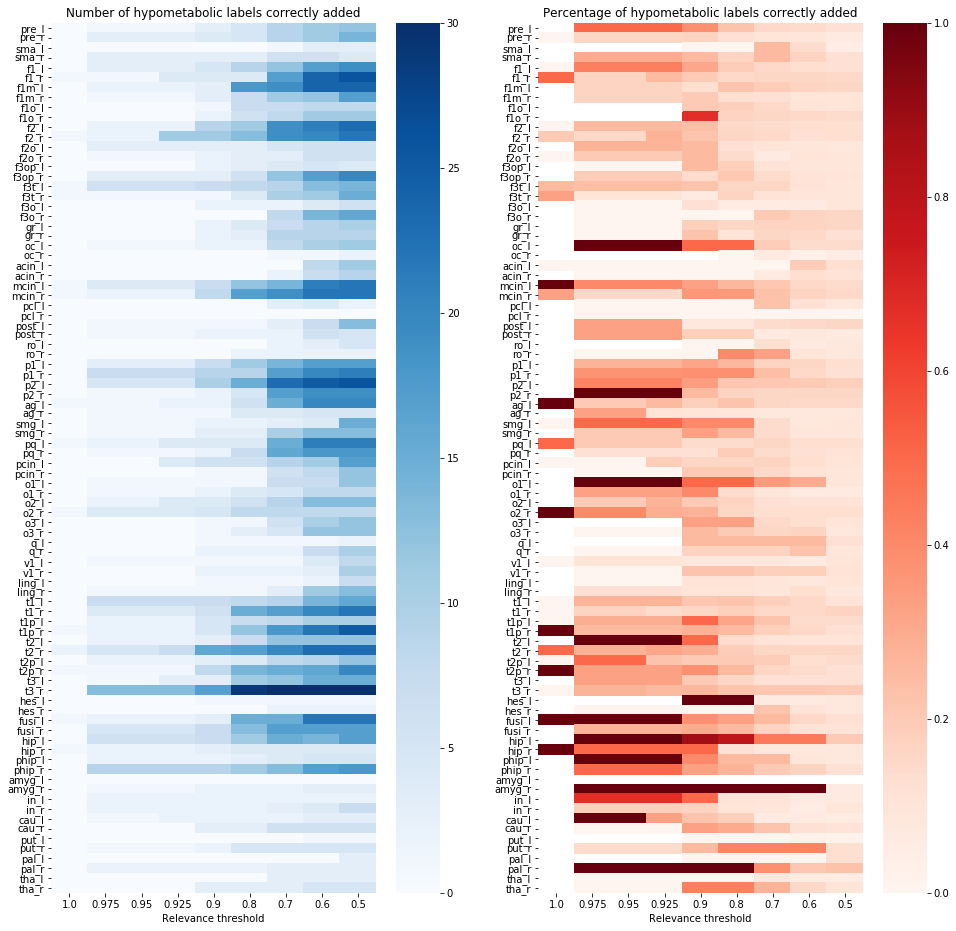

In [18]:
matplotlib.rcParams['figure.figsize'] = (16,16)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_absolute_aal_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_absolute_aal_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

##### Using normalised rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [19]:
comparison_normalised_aal

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,3106,22653,2687,1434,0.862,0.601,0.536,0.684
Relevance threshold = 0.9,3154,22542,2798,1386,0.860,0.601,0.530,0.695
Relevance threshold = 0.8,3156,22521,2819,1384,0.859,0.600,0.528,0.695
Relevance threshold = 0.7,3198,22341,2999,1342,0.855,0.596,0.516,0.704
Relevance threshold = 0.6,3334,21668,3672,1206,0.837,0.578,0.476,0.734
Relevance threshold = 0.5,3433,20922,4418,1107,0.815,0.554,0.437,0.756


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [20]:
for i in added_normalised_aal: print(i)

With a relevance threshold of 0.9, 159 regions were marked as hypometabolic: 48 correctly (30.19 %) and 111 incorrectly
With a relevance threshold of 0.8, 182 regions were marked as hypometabolic: 50 correctly (27.47 %) and 132 incorrectly
With a relevance threshold of 0.7, 404 regions were marked as hypometabolic: 92 correctly (22.77 %) and 312 incorrectly
With a relevance threshold of 0.6, 1213 regions were marked as hypometabolic: 228 correctly (18.8 %) and 985 incorrectly
With a relevance threshold of 0.5, 2058 regions were marked as hypometabolic: 327 correctly (15.89 %) and 1731 incorrectly


Down below we show the **effect that the application of rules have over each of the predicted regions**.

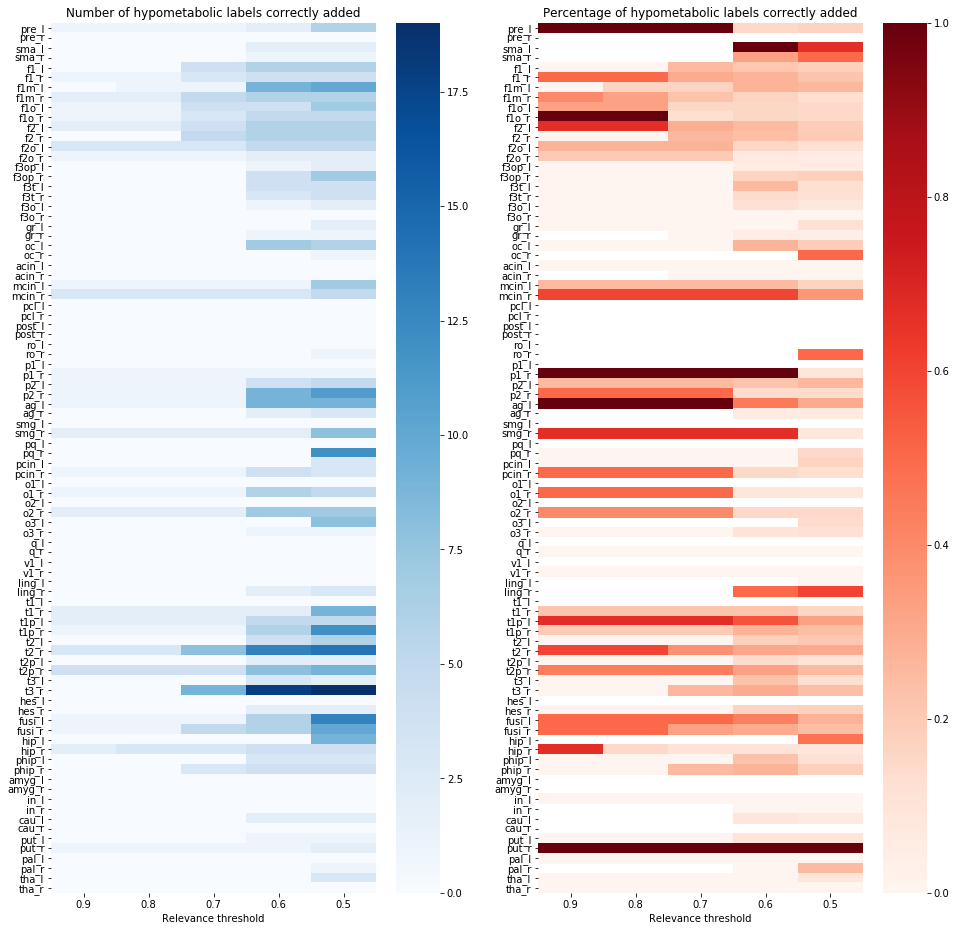

In [21]:
matplotlib.rcParams['figure.figsize'] = (16,16)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_normalised_aal_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_normalised_aal_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

#### Brodmann atlas (47 regions)

##### Using random corrector

A program that randomly changes negative labels to positive labels in our predicted dataset would label correctly what percentage of values?

In [22]:
print(random_brodmann)

5.09 %


##### Using absolute rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [23]:
comparison_absolute_brodmann

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,1639,12109,1207,649,0.881,0.638,0.576,0.716
Relevance threshold = 1,1654,12080,1236,634,0.880,0.639,0.572,0.723
Relevance threshold = 0.975,1760,11784,1532,528,0.868,0.631,0.535,0.769
Relevance threshold = 0.95,1764,11777,1539,524,0.868,0.631,0.534,0.771
Relevance threshold = 0.925,1776,11732,1584,512,0.866,0.629,0.529,0.776
Relevance threshold = 0.9,1814,11595,1721,474,0.859,0.623,0.513,0.793
Relevance threshold = 0.8,1899,11150,2166,389,0.836,0.598,0.467,0.830
Relevance threshold = 0.7,1965,10690,2626,323,0.811,0.571,0.428,0.859
Relevance threshold = 0.6,2018,10292,3024,270,0.789,0.551,0.400,0.882
Relevance threshold = 0.5,2052,9881,3435,236,0.765,0.528,0.374,0.897


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [24]:
for i in added_absolute_brodmann: print(i)

With a relevance threshold of 1, 44 regions were marked as hypometabolic: 15 correctly (34.09 %) and 29 incorrectly
With a relevance threshold of 0.975, 446 regions were marked as hypometabolic: 121 correctly (27.13 %) and 325 incorrectly
With a relevance threshold of 0.95, 457 regions were marked as hypometabolic: 125 correctly (27.35 %) and 332 incorrectly
With a relevance threshold of 0.925, 514 regions were marked as hypometabolic: 137 correctly (26.65 %) and 377 incorrectly
With a relevance threshold of 0.9, 689 regions were marked as hypometabolic: 175 correctly (25.4 %) and 514 incorrectly
With a relevance threshold of 0.8, 1219 regions were marked as hypometabolic: 260 correctly (21.33 %) and 959 incorrectly
With a relevance threshold of 0.7, 1745 regions were marked as hypometabolic: 326 correctly (18.68 %) and 1419 incorrectly
With a relevance threshold of 0.6, 2196 regions were marked as hypometabolic: 379 correctly (17.26 %) and 1817 incorrectly
With a relevance threshold o

Down below we show the **effect that the application of rules have over each of the predicted regions**.

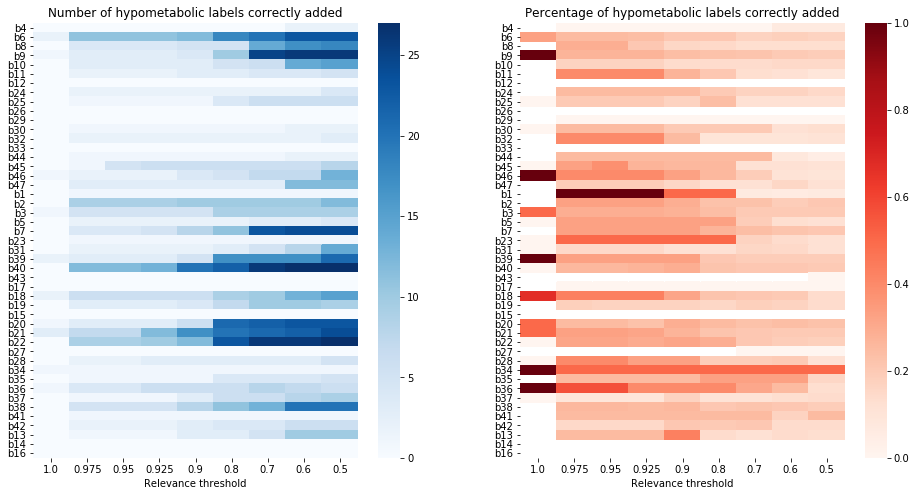

In [25]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_absolute_brodmann_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_absolute_brodmann_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

##### Using normalised rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [26]:
comparison_normalised_brodmann

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,1639,12109,1207,649,0.881,0.638,0.576,0.716
Relevance threshold = 0.9,1664,12049,1267,624,0.879,0.638,0.568,0.727
Relevance threshold = 0.8,1672,12040,1276,616,0.879,0.639,0.567,0.731
Relevance threshold = 0.7,1732,11808,1508,556,0.868,0.627,0.535,0.757
Relevance threshold = 0.6,1771,11534,1782,517,0.853,0.606,0.498,0.774
Relevance threshold = 0.5,1807,11342,1974,481,0.843,0.595,0.478,0.790


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [27]:
for i in added_normalised_brodmann: print(i)

With a relevance threshold of 0.9, 85 regions were marked as hypometabolic: 25 correctly (29.41 %) and 60 incorrectly
With a relevance threshold of 0.8, 102 regions were marked as hypometabolic: 33 correctly (32.35 %) and 69 incorrectly
With a relevance threshold of 0.7, 394 regions were marked as hypometabolic: 93 correctly (23.6 %) and 301 incorrectly
With a relevance threshold of 0.6, 707 regions were marked as hypometabolic: 132 correctly (18.67 %) and 575 incorrectly
With a relevance threshold of 0.5, 935 regions were marked as hypometabolic: 168 correctly (17.97 %) and 767 incorrectly


Down below we show the **effect that the application of rules have over each of the predicted regions**.

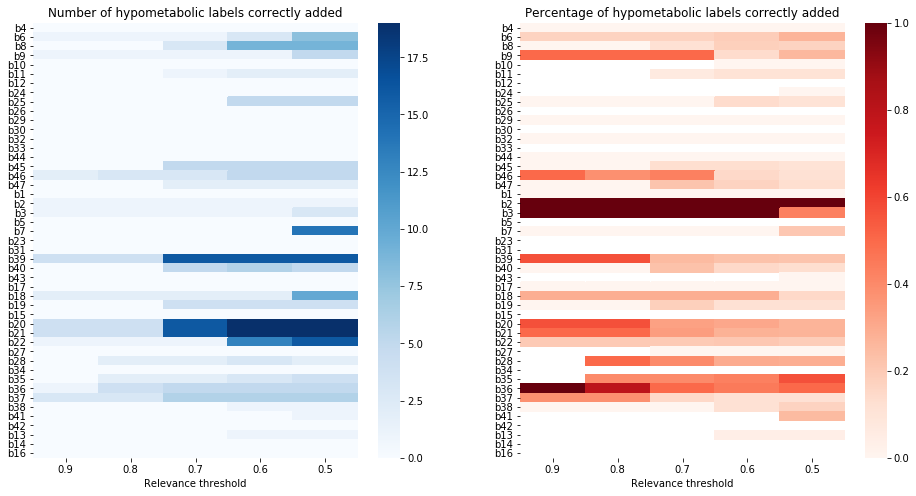

In [28]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_normalised_brodmann_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_normalised_brodmann_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

### Conclusions

In order to measure the validity of our rules, it is important to know what result should we expect if we did random changes from negative labels to positive labels in our predicted datasets. As we have seen, it would be expected that only 5-6% of values are correctly labelled. This low percentage can be explained by two facts. First, the percentage of positive labels is by itself very low in the real dataset (15%). Second, our models have already predicted correctly part of this positive labels, which mean that only very few remain available for correction. Taking this into consideration, it is evident that **our rules perform better than a random generator would do**. Even so, **incorrect modifications are more common than correct modifications**, which explains why accuracy and precision always fall. Recall, on the other hand, can only improve. 

**As we consider lower relevance thresholds**, we allow more rules and more modifications to be considered. When the number of modifications is low, they tend to be more accurate; when the number of modifications is high, they tend to be less accurate. The consequence is that **recall increase while accuracy and precision decrease**. **As for the two different type of rules**, normalised rules result in less changes being made, which makes sense because we are being more strict. However, **absolute rules usually perform better at similar magnitudes**. The explanation is that normalised rules are very useful from the clinical point of view, but a pure data driven mechanism is expected to yield better metrics.

Eventually, if we focus in the correction region by region, it is clear that absolute rules will lead regions with already high levels of hypometabolism to show more changes. This explains why we see blocks where the rules appear to have a greater impact. In the other hand, normalised rules show more realistic relations. Looking at them, we can see that **certain regions appear to be more affected than others by the rules**; these are: T2 (R), T3 (R), B39, B20, B21, B22. To the moment we have only referred to the number of correct changes. In terms of percentage of correct changes, some regions that stand out are: PRE (L), F1O (R), F2 (L), MCIN (R), P1 (R), P2 (R), AG (L), SMG (R), T1P (L), T2 (R), PUT (R), B2, B3, B36.

So, why are we struggling with correctly modifying non-hipometabolism to hipometabolism? 

- **Rules are very simple, which brings uncertainty**: in the rule '*if A is hypometabolic, then B is hypometabolic with a probability of 0.6*' we know the rule can be applied in 60% of cases but we don't know which cases they are; therefore, we may apply it when not needed or not apply it when needed.
- **We are in a very difficult scenario**: many positive labels have already been predicted correctly with our models, so what is left are the difficult cases. 
- **We are in a very unstable scenario**: the models predicted wrongly in some cases, so the rules are acting over uncertain prior knowledge.